In [1]:
!pip install -q kaggle


In [2]:
from google.colab import files
files.upload()

{}

In [3]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
! cp kaggle.json ~/.kaggle


In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                              Netflix TV Shows and Movies                           2MB  2022-05-15 00:01:23           5805        183  1.0              
surajjha101/stores-area-and-sales-data                                Supermarket store branches sales analysis            10KB  2022-04-29 11:10:16           5237        155  1.0              
devansodariya/student-performance-data                                Student Performance Dataset                           7KB  2022-05-26 13:55:09           2198        110  0.9705882        
paradisejoy/top-hits-spotify-f

In [7]:
!kaggle datasets download -d l3llff/flowers

flowers.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
! unzip flowers.zip

Archive:  flowers.zip
replace flowers/astilbe/10091895024_a2ea04cda6_c.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [9]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
import glob

In [11]:
train_files=glob.glob("/content/flowers/*/**")

In [12]:
from random import shuffle
shuffle(train_files)
train_files

['/content/flowers/tulip/15053326739_1dd476af4a_c.jpg',
 '/content/flowers/water_lily/48324400856_aa5c4680a7_c.jpg',
 '/content/flowers/dandelion/5663524091_6e784d444b_c.jpg',
 '/content/flowers/water_lily/4548046680_2d9d4f8cee_c.jpg',
 '/content/flowers/tulip/17039290000_27dd4c6d07_c.jpg',
 '/content/flowers/dandelion/9086668155_ef4e026b1b_c.jpg',
 '/content/flowers/daffodil/4463909970_856ffcc6b3_c.jpg',
 '/content/flowers/california_poppy/23231303154_066a24da3d_c.jpg',
 '/content/flowers/magnolia/5588519501_7e907bb9e8_c.jpg',
 '/content/flowers/coreopsis/14089821291_f89324abe5_c.jpg',
 '/content/flowers/dandelion/4682526521_dde5bf3043_c.jpg',
 '/content/flowers/magnolia/3480304099_22950c3df5_c.jpg',
 '/content/flowers/california_poppy/2090047735_f34428fdfa_c.jpg',
 '/content/flowers/astilbe/9193425002_f3bbdd0e1f_c.jpg',
 '/content/flowers/rose/14805639873_8755a494c4_c.jpg',
 '/content/flowers/coreopsis/166381034_90adc1b8d2_c.jpg',
 '/content/flowers/black_eyed_susan/5936674468_04882d

In [13]:
from PIL import Image
import cv2

In [14]:
key1 = 's/'
key2='/'


In [15]:

label=(train_files[0].partition(key1)[2]).partition(key2)[0]    #Later the label(Y_train[0]) will also come out to be the same!
label

'tulip'

In [16]:
len(train_files)

15740

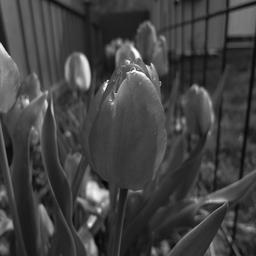

In [28]:
img1= Image.open(train_files[0]).convert(mode='L')
img1

In [30]:
img_arr=np.array(img1)
img_arr

array([[ 98, 110, 116, ...,  87,  80,  74],
       [ 96, 109, 116, ...,  59,  48,  40],
       [ 93, 107, 115, ...,  27,  20,  15],
       ...,
       [ 58,  69,  78, ...,  32,  26,  23],
       [ 44,  55,  65, ...,  35,  29,  26],
       [ 33,  43,  53, ...,  40,  34,  30]], dtype=uint8)

In [19]:
X_train = np.zeros((len(train_files),256,256),dtype=np.int)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [20]:
Y_train=[]

In [21]:
i=0
for fi in train_files:
    im=cv2.imread(fi, cv2.IMREAD_GRAYSCALE)
    new_array=cv2.resize(im,(256,256))
    X_train[i,:,:]=new_array
    label=train_files[i].partition(key1)[2].partition(key2)[0]
    Y_train.append(label)
    i=i+1

In [22]:
X_train[0,:,:]

array([[ 98, 110, 116, ...,  87,  80,  74],
       [ 96, 109, 116, ...,  59,  48,  40],
       [ 93, 107, 115, ...,  27,  20,  15],
       ...,
       [ 58,  69,  78, ...,  32,  26,  23],
       [ 44,  55,  65, ...,  35,  29,  26],
       [ 31,  43,  53, ...,  40,  34,  30]])

In [23]:
Y_train[0]

'tulip'

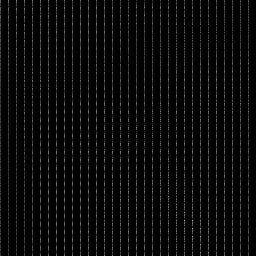

In [32]:
from PIL import Image
data = Image.fromarray(X_train[0,:,:],'L')
data